# CS5242 HW1: Get started with PyTorch

PyTorch is an open source machine learning framework with 58k stars on the [github](https://github.com/pytorch/pytorch). In this code tutorial we will learn the basic of PyTorch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.

## Section 1: Environmental Setup

First, we need to install the PyTorch and check the pytorch version.

In [ ]:
!pip3 install torch

import torch
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.12.1+cu113'

Here are some routines for importing and setting up torch.

In [1]:
# frequently used import
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt

# fix the random number so that the experiments are reproducible
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

The best referrence for pytorch is its [document](https://pytorch.org/docs/stable/index.html). PyTorch is well-known for a good community.

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.

In [2]:
!nvidia-smi

Mon Aug 29 03:22:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Here, you can see the memory and memory usage of the applied GPU. For my case, the applied one is a Tesla T4. The GPU applied may be different, but it is ok for our experiments.

Now let's create tensor, which is the basic element in PyTorch.

In [12]:
x1 = torch.tensor(1.0) # tensor on CPU
x2 = torch.tensor(1.0, device="cuda:0") # tensor on GPU
x3 = torch.tensor(1.0, requires_grad=True).cuda() # tensor on GPU and require grad
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor(1.)
x2: tensor(1., device='cuda:0')
x3: tensor(1., device='cuda:0', grad_fn=<ToCopyBackward0>)


In the following sections, you need to fill in the code to complete the function and answer the questions.

The question will be in the form:

===> Question: What is deep learning?  
===> Answer:  
Your answer here.

The code completion will be in the form:

In [ ]:
# === Complete the code

# === Complete the code

Grades: HW1 is composed of two parts and 10 points in all. Each part contains 5 points.  

The homework on PDF consists of 10 questions, each is worth 0.5 points. You can write the answer by LaTeX, word or handwritting (take photo) and submit to the system.  

The homework here on notebook (colab) consists of several code completions and 5 questions. There are 18 units for code completions (one unit for one line, which is also a hint). And there are 12 units for questions. 30 units in total will share the 5 points. For submission, you need to submit the notebook with output.

15% off per day late (17:01 is the start of one day)​

0 score if you submit it 7 days after the deadline​

Deadline for homework on PDF: 17:00, 22 Aug  
Deadline for homework on Notebook: 17:00, 30 Aug

## Section 2: Basic Usage

In [13]:
# 2.1: Use autograd to calculate gradients

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
y = torch.tensor(4.)

# Build a computational graph.
pred = w * x + b
L = (pred - y)**2

# Compute gradients.
# === Complete the code (1')
L.backward()
# === Complete the code

# Print out the gradients.
print(x.grad)
print(w.grad)
print(b.grad)

tensor(4.)
tensor(2.)
tensor(2.)


===> Question 1: Compute the above gradients on your own and show the result from PyTorch is correct. (2')  
===> Answer: The gradients are as follows:

$\frac{\partial L}{\partial x} = \frac{\partial }{\partial x} ((w * x + b - y)^2) = 2(w * x + b - y)*w$

$\frac{\partial L}{\partial w} = \frac{\partial }{\partial w} ((w * x + b - y)^2) = 2(w * x + b - y)*x$

$\frac{\partial L}{\partial b} = \frac{\partial }{\partial b} ((w * x + b - y)^2) = 2(w * x + b - y)$

Substituting values of $x=1, w=2, b=3, y=4$:

$2(w*x+b-y) = 2(2*1+3-4) = 2$

Therefore:

$\frac{\partial L}{\partial x} = 2*2 = 4$ <br/>
$\frac{\partial L}{\partial w} = 2*1 = 2$ <br/>
$\frac{\partial L}{\partial b} = 2$ <br/>

The results are verified with those obtained from Pytorch.

In [14]:
# 2.2 update parameters by gradient descent

# we want to update parameters w and b
lr = 0.01

# 1-step gradient descent
# === Complete the code (2')
w = torch.tensor(w - (lr*w.grad), requires_grad=True)
b = torch.tensor(b - (lr*b.grad), requires_grad=True)
# === Complete the code

# current loss
pred = w * x + b
L = (pred - y)**2

print(w)
print(b)
print(L)

tensor(1.9800, requires_grad=True)
tensor(2.9800, requires_grad=True)
tensor(0.9216, grad_fn=<PowBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


In [15]:
# 2.3 update parameters by optimizer

# Use SGD optimizer
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 5-step gradient descent.
for t in range(5):
  pred = w * x + b
  L = (pred - y)**2
  optimizer.zero_grad()
  # === Complete the code (2')
  L.backward()
  optimizer.step()
  # === Complete the code

print(w)
print(b)
print(L)

tensor(1.8914, requires_grad=True)
tensor(2.8914, requires_grad=True)
tensor(0.6648, grad_fn=<PowBackward0>)


===> Question 2: Why do we need `optimizer.zero_grad()`? (1') What happens if we do not `zero_grad` in each step? (1')  
===> Answer: The `optimizer.zero_grad()` function sets all the gradients to zero. We need this in order to reset the gradients at every step of our training process. This is because PyTorch accumulates gradients on every step of the training. In order to only preserve the newer (improved weights) from each step, we use `zero_grad` to reset the gradient to 0 after iterations to ensure parameter updates happen correctly.

If we do not use `zero_grad`, the gradients across the model would keep accumulating and lead to inaccurate updates of the model parameters. It can lead to an non-decreasing or increasing loss across epochs during training as the gradients are not reset.

===> Question 3: What's the meaning of `grad_fn=<PowBackward0>`? (1')  
===> Answer: The `grad_fn` argument is used to indicate the function that led to the creation of the tensor variable. It indicates that a power (exponent) has been used to create the variable it references, which is true in our case for $L$ where $L = (pred-y)^2$ 


In [16]:
# 2.4 create tensors

shape = (2, 3)

# create an empty tensor
x = torch.empty(shape)
print(x)

# create a full-zero tensor with type long
# === Complete the code (1')
x = torch.zeros(shape, dtype=torch.long)
# === Complete the code
print(x)

# create a a tensor filled with random numbers from 
# a uniform distribution on the interval [0, 1)
# === Complete the code (1')
x = torch.empty(shape).uniform_()
# === Complete the code
print(x)

# create a tensor filled with random numbers from a standard normal distribution
# === Complete the code (1')
x = torch.empty(shape).normal_()
# === Complete the code
print(x)

# create a tensor from numpy
x = np.array([[1, 2], [3, 4]])
# === Complete the code (1')
x = torch.from_numpy(x)
# === Complete the code
print(x)

# convert a tensor to numpy
x = x.numpy()
print(x)

tensor([[4.0313e+05, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
tensor([[ 1.2645, -0.6874,  0.1604],
        [-0.6065, -0.7831,  1.0622]])
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [17]:
# 2.5 gradient of matrix and vector

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

# Forward pass.
pred = linear(x)

# Compute loss.
# === Complete the code (1')
loss = criterion(pred, y)
# === Complete the code
print('loss: ', loss.item())

# Backward pass.
loss.backward()
# Print out the gradients.
# === Complete the code (2')
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)
# === Complete the code

w:  Parameter containing:
tensor([[ 0.5431,  0.3890, -0.2517],
        [-0.1453, -0.5500, -0.0104]], requires_grad=True)
b:  Parameter containing:
tensor([-0.4348, -0.4453], requires_grad=True)
loss:  2.650336503982544
dL/dw:  tensor([[ 1.0951,  0.9776, -1.2607],
        [ 0.0268, -1.7639, -0.2130]])
dL/db:  tensor([-0.3936, -1.1098])


===> Question 4: What is the function of the above code? Do a shape check for the gradient computation above. (2')  
===> Answer: The code above creates a simple Linear Neural Network with 3 input and 2 output features. Using Mean Squared Error Loss, the gradient is calculated on one iteration for the weights and bias of the model. 

The model created is as follows:

$Y = X*W^T + b$ where

Shape of $Y = 10\times2$ <br/>
Shape of $X = 10\times3$ <br/>
Shape of $W = 2\times3$ <br/>
Shape of $b = 1\times2$ <br/>

Note: $b$ gets broadcast to a $10\times2$ when being added to the product of $X*W^T$.

MSE Loss is implemented as: `loss = (pred-y)**2).mean()` and

$loss = \frac{1}{N} * ||\tilde Y - Y||^2$ where loss is a scalar.

Computing the gradients:

$\frac{\partial loss}{\partial W} = \frac{2}{N}(X * W^T + b - y)^T*X$ of shape $2\times3$

$\frac{\partial loss}{\partial b} = \frac{2}{N}(X * W^T + b - y)$ of shape $10\times2$ which gets accumulated sequentially on the bias of shape $1\times2$



## Section 3: Linear Regression


In [18]:
# Hyper-parameters
input_size = 1
output_size = 1

# Toy dataset
x_train = np.array([[3.2], [4.1], [5.6], [7.69], [6.3], [4.112], 
                    [9.79], [5.182], [6.59], [3.167], [7.042], 
                    [10.921], [5.268], [7.9], [3.0]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [19]:
def main(learning_rate=0.001, num_epochs = 60):
  # Linear regression model
  model = nn.Linear(input_size, output_size)

  # Loss and optimizer
  criterion = nn.MSELoss()

  # Create optimizer
  # Hint: check manual for model.parameters
  # === Complete the code (1')
  optimizer = torch.optim.SGD([model.weight, model.bias], lr=learning_rate)
  # === Complete the code

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      # === Complete the code (2')
      outputs = model(inputs)
      loss = criterion(targets, outputs)
      # === Complete the code
      
      # Backward and optimize
      # === Complete the code (3')
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # === Complete the code
      
      if (epoch+1) % 5 == 0:
          print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

  # Plot the graph
  predicted = model(torch.from_numpy(x_train)).detach().numpy()
  plt.plot(x_train, y_train, 'ro', label='Original data')
  plt.plot(x_train, predicted, label='Fitted line')
  plt.legend()
  plt.show()

Epoch [5/60], Loss: 3.5557
Epoch [10/60], Loss: 1.5880
Epoch [15/60], Loss: 0.7714
Epoch [20/60], Loss: 0.4324
Epoch [25/60], Loss: 0.2917
Epoch [30/60], Loss: 0.2333
Epoch [35/60], Loss: 0.2090
Epoch [40/60], Loss: 0.1988
Epoch [45/60], Loss: 0.1946
Epoch [50/60], Loss: 0.1928
Epoch [55/60], Loss: 0.1920
Epoch [60/60], Loss: 0.1916


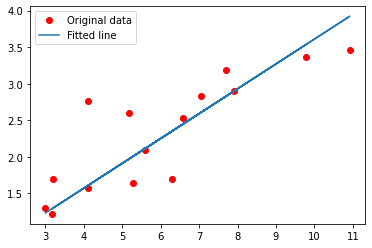

In [20]:
main()

Now let's investigate into how learning rate affects the training process.

===> Question 5: Experiments with different learning rates and num_epochs.   
When will the training diverges? What's your suggested value for the learning rate?   
Justify your answer by running more experiments (leaving the results in the notebook). (5')     
===> Answer: The experiment is rerun with a modified main function called `experiment()` which returns the list of losses through the epochs. The relevant code for the blocks can be found in the subsequent cells.

The learning rate is iterated from 0.001 to 1 with a step size of 0.001 and we can see that the training stops to converge after a learning rate of 0.023 and starts to diverge at 0.024.

Comparing the final loss values for the learning rates from 0.001 to 0.023 after the default number of epochs (60) at the given seed, we can see that 0.012 gives us the lowest loss value of 0.16 making 0.012 the best learning rate.

Experiments across the learning rates for calculating the best epoch are done by training for a 1000 epochs and finding the epochs where the difference in loss is less than 0.1% of the previous. This gives an indication of where the training loss starts to plateau. However, this number varies significantly across different learning rates. For the learning rate of 0.12 we see than beyond the 2nd epoch only minor changes in the loss can be seen.

However we were able to improve out best loss from 0.19 to 0.16 by experiments over the parameters.

Epoch [5/60], Loss: 0.1614
Epoch [10/60], Loss: 0.1613
Epoch [15/60], Loss: 0.1613
Epoch [20/60], Loss: 0.1612
Epoch [25/60], Loss: 0.1612
Epoch [30/60], Loss: 0.1611
Epoch [35/60], Loss: 0.1610
Epoch [40/60], Loss: 0.1610
Epoch [45/60], Loss: 0.1609
Epoch [50/60], Loss: 0.1609
Epoch [55/60], Loss: 0.1608
Epoch [60/60], Loss: 0.1608


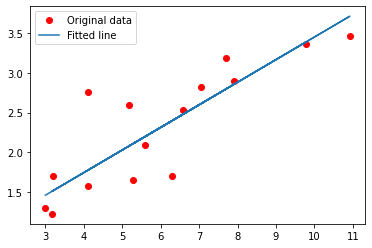

In [21]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

main(learning_rate=0.012, num_epochs = 60)

In [22]:
# Modified main function for experiment to return losses
def experiment(learning_rate = 0.001, num_epochs = 60):
  # Linear regression model
  model = nn.Linear(input_size, output_size)

  # Loss and optimizer
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD([model.weight, model.bias], lr=learning_rate)

  # Result array
  res = []

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      outputs = model(inputs)
      loss = criterion(targets, outputs)
      
      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      res.append(loss.item())
  return(res)

In [23]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

# Experiment for divergence on given loss function
step = 0.001
loss_range = np.arange(0.001, 1.0, step)
prev_converge = True
for loss in loss_range:
  losses = experiment(loss)
  converge = (losses == sorted(losses, reverse=True))
  if(not converge and prev_converge):
    print(f'Model training starts to diverge after learning rate {loss-(step):.3f}')
    loss_range = np.arange(loss_range[0], loss-step, step)
    break

Model training starts to diverge after learning rate 0.023


The best loss value of 0.16000889241695404 occurs at learning rate 0.012


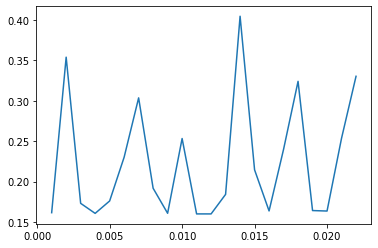

In [24]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

# Experiment for best learning rate on loss function
best_losses = []
for loss in loss_range:
    best_losses.append(experiment(loss, 60)[-1])
print(f'The best loss value of {min(best_losses)} occurs at learning rate {loss_range[np.argmin(best_losses)]}')
# Plot the graph
plt.plot(loss_range, best_losses, label='Loss values')
plt.show()

In [26]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

# Experiment for finding epoch value
# Epoch plateau is calculated by the epoch where the average of the next 
# 5 epochs differs from current by less than 0.1%.
epochs = 1000
for loss in loss_range:
  losses = experiment(loss, epochs)
  for i in range(epochs-5):
    if(abs((losses[i] - np.mean(losses[i:i+5]))/losses[i]) < 0.001*losses[i]):
      print(f'Epoch for learning rate {loss:.3f} where loss starts to plateau is {i}')
      break


Epoch for learning rate 0.001 where loss starts to plateau is 61
Epoch for learning rate 0.003 where loss starts to plateau is 326
Epoch for learning rate 0.004 where loss starts to plateau is 15
Epoch for learning rate 0.005 where loss starts to plateau is 515
Epoch for learning rate 0.006 where loss starts to plateau is 973
Epoch for learning rate 0.008 where loss starts to plateau is 627
Epoch for learning rate 0.009 where loss starts to plateau is 4
Epoch for learning rate 0.010 where loss starts to plateau is 768
Epoch for learning rate 0.011 where loss starts to plateau is 3
Epoch for learning rate 0.012 where loss starts to plateau is 2
Epoch for learning rate 0.013 where loss starts to plateau is 444
Epoch for learning rate 0.014 where loss starts to plateau is 748
Epoch for learning rate 0.015 where loss starts to plateau is 516
Epoch for learning rate 0.016 where loss starts to plateau is 189
Epoch for learning rate 0.017 where loss starts to plateau is 521
Epoch for learning